In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/CSV_without Header.csv')

In [ ]:
data

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [ ]:
x = data['eruptions']
y = data['waiting']

In [ ]:
x

0      3.600
1      1.800
2      3.333
3      2.283
4      4.533
       ...  
267    4.117
268    2.150
269    4.417
270    1.817
271    4.467
Name: eruptions, Length: 272, dtype: float64

In [ ]:
y

0      79
1      54
2      74
3      62
4      85
       ..
267    81
268    46
269    90
270    46
271    74
Name: waiting, Length: 272, dtype: int64

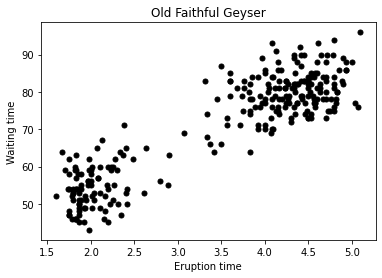

In [ ]:
plt.scatter(x,y,  color='k', s=25, marker="o")
plt.xlabel('Eruption time')
plt.ylabel('Waiting time')
plt.title('Old Faithful Geyser')
plt.show()

In [ ]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        list1 = []
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
             
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            temp_error = self.compute_sse(X, self.labels, self.centroids)
            list1.append(temp_error)
            
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
        return list1

    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


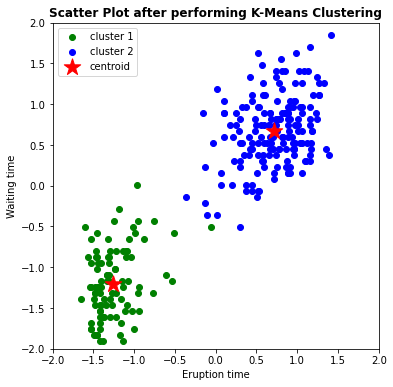

In [ ]:
# Modules
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.preprocessing import StandardScaler


# Standardize the data
X_std = StandardScaler().fit_transform(data)

# Run local implementation of kmeans
km = Kmeans(n_clusters=2, max_iter=100)
error_list = km.fit(X_std)

centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time')
plt.ylabel('Waiting time')
plt.title('Scatter Plot after performing K-Means Clustering', fontweight='bold')
ax.set_aspect('equal');

In [ ]:
error_list

[128.47282393545888,
 80.96792556114684,
 79.63566081947323,
 79.57595948827701,
 79.57595948827701]

In [ ]:
x=[1,2,3,4,5]
y= error_list

Text(0.5, 1.0, 'Plot of Objective Function vs Iteration')

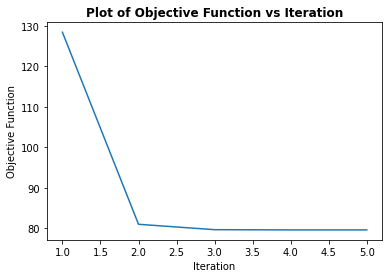

In [ ]:
plt.plot(x,y)
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.title('Plot of Objective Function vs Iteration', fontweight='bold')

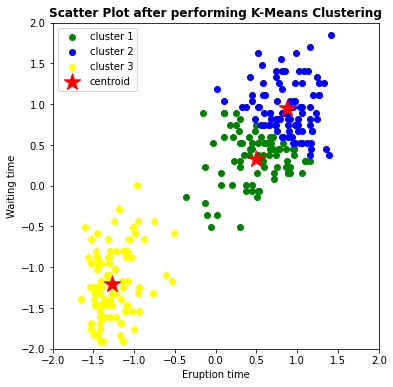

In [ ]:
# Modules
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.preprocessing import StandardScaler


# Standardize the data
X_std = StandardScaler().fit_transform(data)

# Run local implementation of kmeans
km = Kmeans(n_clusters=3, max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[km.labels == 2, 0], X_std[km.labels == 2, 1],
            c='yellow', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time')
plt.ylabel('Waiting time')
plt.title('Scatter Plot after performing K-Means Clustering', fontweight='bold')
ax.set_aspect('equal');